# Setup

In [9]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
%cd /content/drive/MyDrive/Python - Time Series Forecasting/Time Series Analysis/Exponential Smoothing and Holt Winters

/content/drive/MyDrive/Python - Time Series Forecasting/Time Series Analysis/Exponential Smoothing and Holt Winters


In [42]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [12]:
# Set the index when we import the data
df = pd.read_csv("weekly_customer_complaints.csv", index_col = "week", parse_dates=True)
df.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [13]:
# Change the name of the time series variable t y
df = df.rename(columns = {"complaints": "y"})
df.head()

,y,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [14]:
# Preview of thedf info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2018-01-01 to 2022-12-26
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   y                        261 non-null    object
 1   discount_rate            261 non-null    object
 2   small_commercial_event   261 non-null    int64 
 3   medium_commercial_event  261 non-null    int64 
 4   big_commercial_event     261 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 12.2+ KB


In [15]:
# Remove the comma from df.y and transform into an integer
df["y"] = df["y"].str.replace(",", "").astype(int)
#df['y'].str.replace(',', '').astype(int)
df.head()

,y,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750,37.26%,1,0,0
2018-01-08,1701,35.38%,0,0,0
2018-01-15,1711,36.22%,1,0,0
2018-01-22,1443,38.33%,1,0,0
2018-01-29,1397,36.34%,0,0,0


# Data Visualization

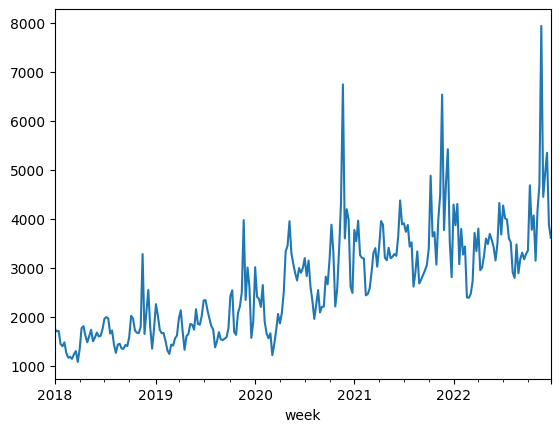

In [16]:
# Daily Closing Price Plot
df["y"].plot()
plt.show()

# Seasonality

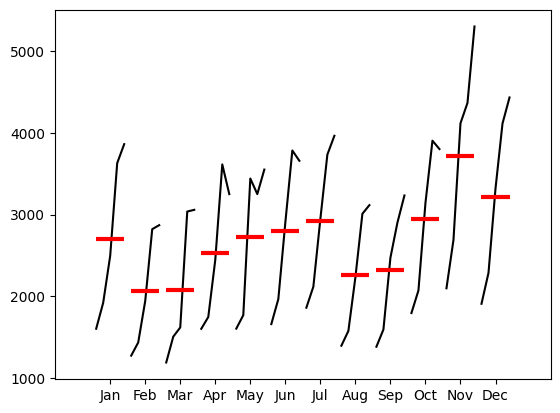

In [17]:
# Plot the month_plot
month_plot(df['y'].resample('ME').mean())
plt.show()

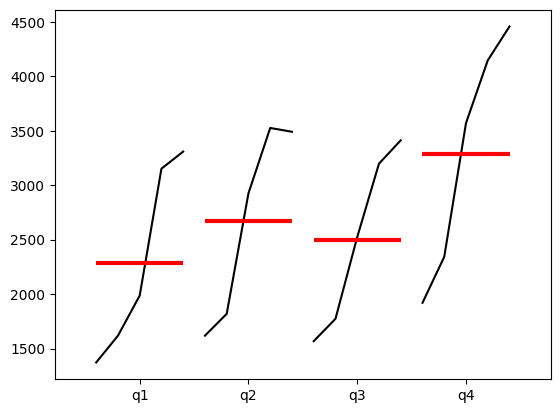

In [18]:
# Plot the quarter_plot
quarter_plot(df['y'].resample("QE").mean())
plt.show()

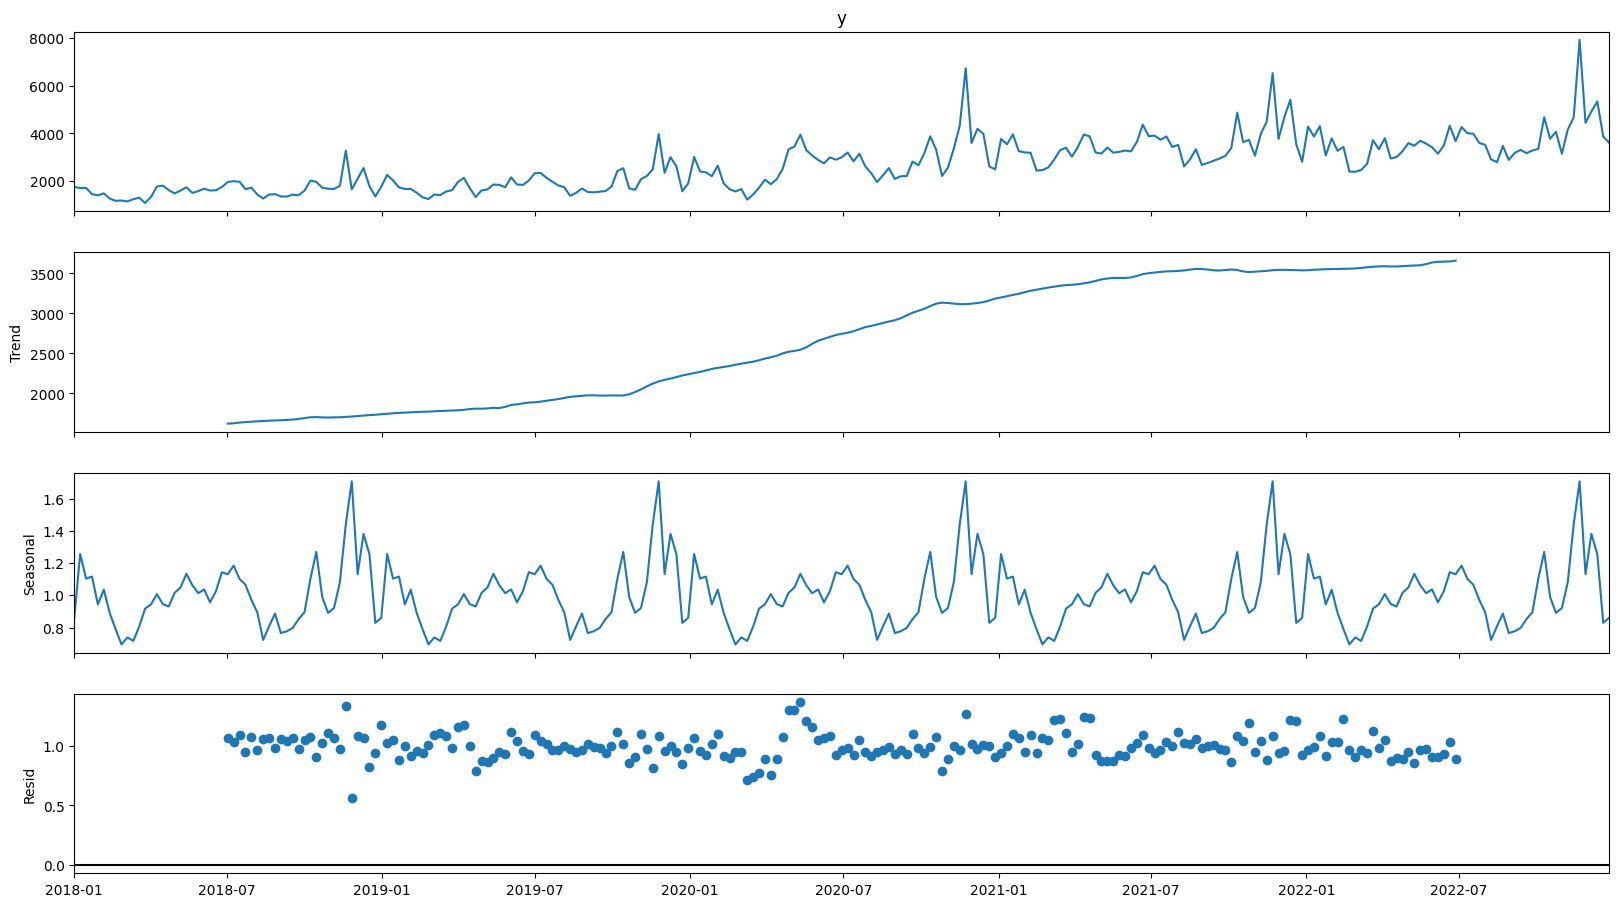

In [19]:
# Seasonal decomposition for df['Adj. Close']
decomposition = seasonal_decompose(df['y'],
                                  model = 'multiplicative',
                                  period = 52)
fig = decomposition.plot()
fig.set_size_inches(18, 10)
plt.show()

# (Partial) Auto-Correlation

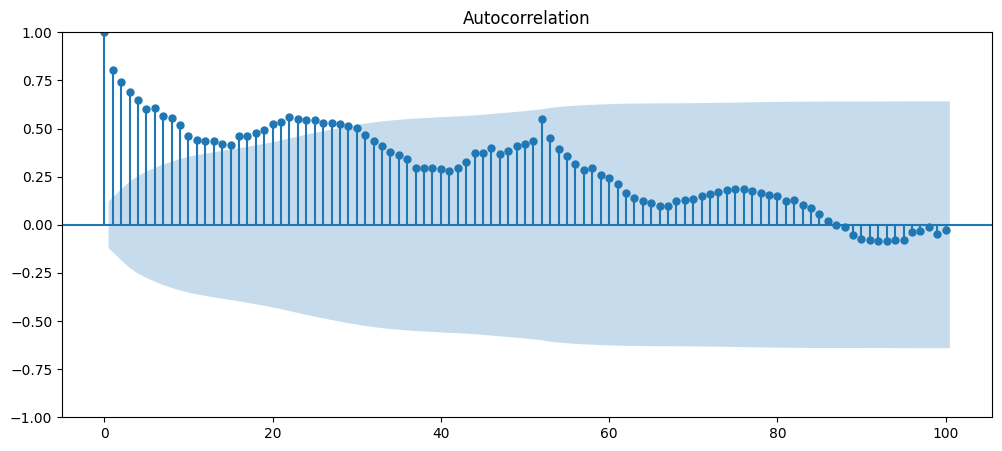

In [20]:
# Plot the ACF of the
fig, ax = plt.subplots(figsize = (12, 5))
plot_acf(df['y'], lags = 100, ax = ax)
plt.show()

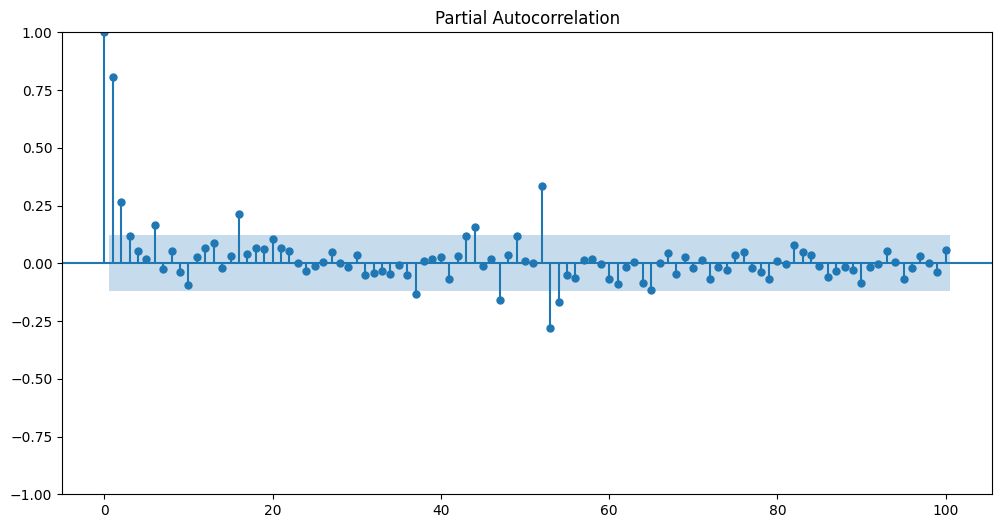

In [21]:
# PACF
fig, ax = plt.subplots(figsize = (12, 6))
plot_pacf(df['y'], lags = 100, ax = ax)
plt.show()

# Time Series Frequency

In [22]:
# PRint the frequency of the time series
df.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq=None)

In [23]:
# Change the frequency the W-Mon
df = df.asfreq('W-Mon')
df.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq='W-MON')

# Training and Test

## GOAL: Predict the next 13 weeks

In [24]:
# Split the data into training and test
periods = 13
# train = df[:-periods].y
# test = df[-periods:].y

In [25]:
# Other way to split data
train, test = df.iloc[:-periods, 0], df.iloc[-periods:, 0]

# Simple exponential smoothing

In [29]:
# Apply SES to the train
ses_model = SimpleExpSmoothing(train).fit()
print(ses_model.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                      y   No. Observations:                  248
Model:             SimpleExpSmoothing   SSE                       74355648.448
Optimized:                       True   AIC                           3131.513
Trend:                           None   BIC                           3138.540
Seasonal:                        None   AICC                          3131.678
Seasonal Periods:                None   Date:                 Fri, 14 Feb 2025
Box-Cox:                        False   Time:                         10:14:49
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5115116                alpha                 True
initial_level              1750.0000                

In [32]:
# Compute with the initial level
train.iloc[-1] * 0.51 + 1750

3422.29

In [30]:
# Predictions
ses_pred = ses_model.forecast(periods)
ses_pred

,0
2022-10-03,3236.834414
2022-10-10,3236.834414
2022-10-17,3236.834414
2022-10-24,3236.834414
2022-10-31,3236.834414
2022-11-07,3236.834414
2022-11-14,3236.834414
2022-11-21,3236.834414
2022-11-28,3236.834414
2022-12-05,3236.834414


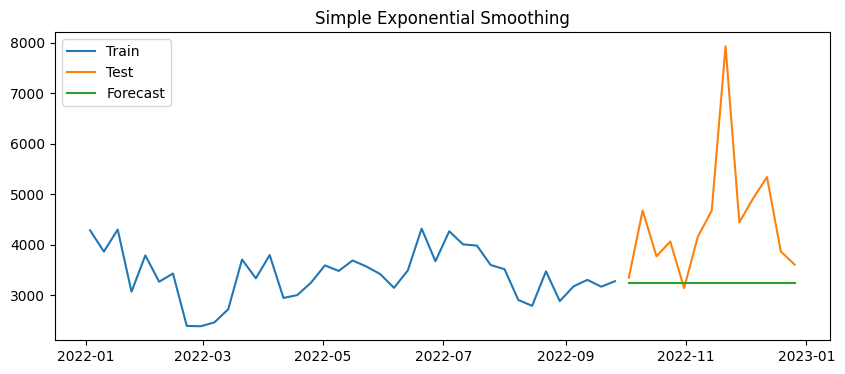

In [35]:
# Set the size of the plot of 10 by 4
plt.figure(figsize = (10, 4))

# Plot the train, test and forecast data
plt.plot(train.loc['2022'], label = "Train")
plt.plot(test, label = "Test")
plt.plot(ses_pred, label = "Forecast")

# Add a title and legend to the plot
plt.title("Simple Exponential Smoothing")
plt.legend()
plt.show()

# Double Exponential Smoothing

In [36]:
# Build double exponential smoothing model
model_double = ExponentialSmoothing(
    endog = train,
    trend = "add",
    seasonal = None).fit()
print(model_double.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                        y   No. Observations:                  248
Model:             ExponentialSmoothing   SSE                       75700147.619
Optimized:                         True   AIC                           3139.958
Trend:                         Additive   BIC                           3154.011
Seasonal:                          None   AICC                          3140.306
Seasonal Periods:                  None   Date:                 Fri, 14 Feb 2025
Box-Cox:                          False   Time:                         10:21:28
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5212797                alpha                 True
smoothing_trend            0.01902

In [37]:
# Predict witd the double ES model
double_pred = model_double.forecast(periods)
double_pred

,0
2022-10-03,3234.055865
2022-10-10,3232.618089
2022-10-17,3231.180312
2022-10-24,3229.742536
2022-10-31,3228.304760
2022-11-07,3226.866984
2022-11-14,3225.429208
2022-11-21,3223.991432
2022-11-28,3222.553655
2022-12-05,3221.115879


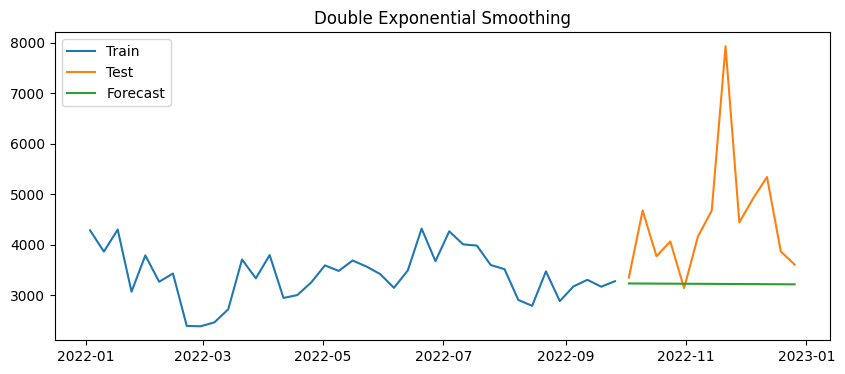

In [38]:
# Plot the train, test and forecast
plt.figure(figsize = (10, 4))

# Plot the train, test and forecast data
plt.plot(train.loc['2022'], label = "Train")
plt.plot(test, label = "Test")
plt.plot(double_pred, label = "Forecast")

# Add a title and legend to the plot
plt.title("Double Exponential Smoothing")
plt.legend()
plt.show()


# Holt Winter aka Tripe Exponential Smoothing

In [51]:
# Build the Holt-Winters model
model_holt = ExponentialSmoothing(
    endog = train,
    trend = "mul",
    seasonal = "mul",
    seasonal_periods = 52).fit()
#print(model_holt.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [54]:
# Predict with the Holt-Winters model
holt_pred = model_holt.forecast(periods)
holt_pred[:5]

,0
2022-10-03,4050.853472
2022-10-10,5064.271350
2022-10-17,3950.263061
2022-10-24,3559.618490
2022-10-31,3459.049248


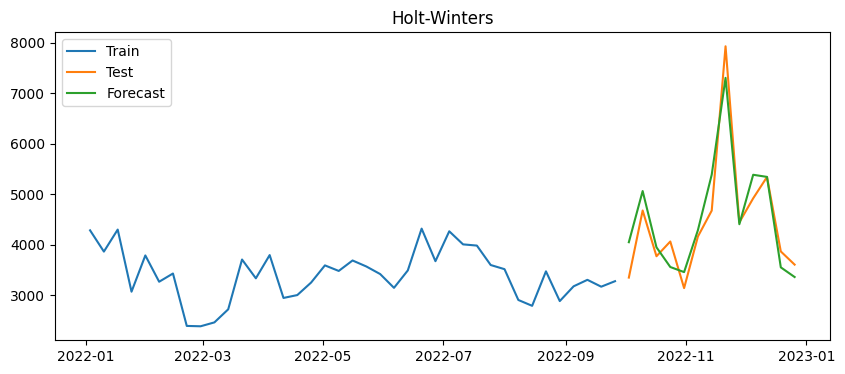

In [55]:
# Plot the Train, Test and Forecast
plt.figure(figsize = (10, 4))

# Plot the train, test and forecast
plt.plot(train.loc['2022'], label = "Train")
plt.plot(test, label = "Test")
plt.plot(holt_pred, label = "Forecast")

# Add a title and legend to the plot
plt.title("Holt-Winters")
plt.legend()
plt.show()

In [56]:
# Calculate and print the RMSE, MAE and MAPE
rmse = root_mean_squared_error(test, holt_pred)
mae = mean_absolute_error(test, holt_pred)
mape = mean_absolute_percentage_error(test, holt_pred)

print(f"RMSE: {rmse:.0f}")
print(f"MAE: {mae:.0f}")
print(f"MAPE: {100 * mape:.1f} %")


RMSE: 422
MAE: 355
MAPE: 8.3 %


RMSE: 425
MAE: 366
MAPE: 8.5 %

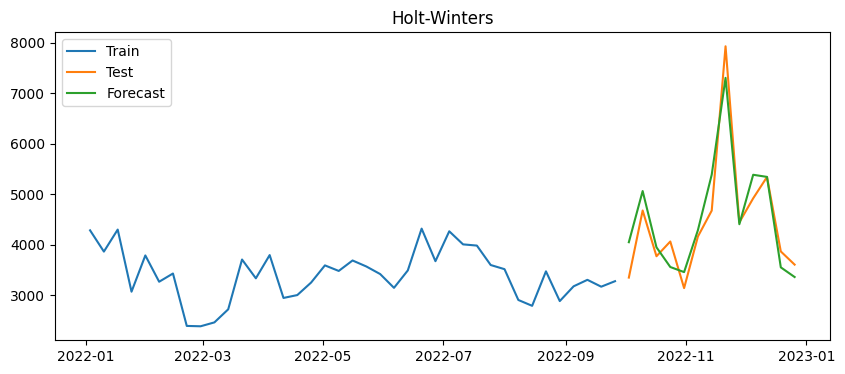

RMSE: 422
MAE: 355
MAPE: 8.3 %


In [58]:
# Function the assesses the model and visualizes the train, test and forecast.
def model_assessment(train, test, predictions, chart_title = None):
  # Set the size of the plot of 10 by 4
  plt.figure(figsize = (10, 4))

  # Plot the train, test and forecast data
  plt.plot(train, label = "Train")
  plt.plot(test, label = "Test")
  plt.plot(predictions, label = "Forecast")
  plt.title(chart_title)
  plt.legend()
  plt.show()

  # Calculate and print the RMSE, MAE and MAPE
  rmse = root_mean_squared_error(test, predictions)
  mae = mean_absolute_error(test, predictions)
  mape = mean_absolute_percentage_error(test, predictions)

  print(f"RMSE: {rmse:.0f}")
  print(f"MAE: {mae:.0f}")
  print(f"MAPE: {100 * mape:.1f} %")

# Apply the function
model_assessment(train.loc['2022'], test, holt_pred, "Holt-Winters")
